# Project Idea: Human Resources Data Analysis

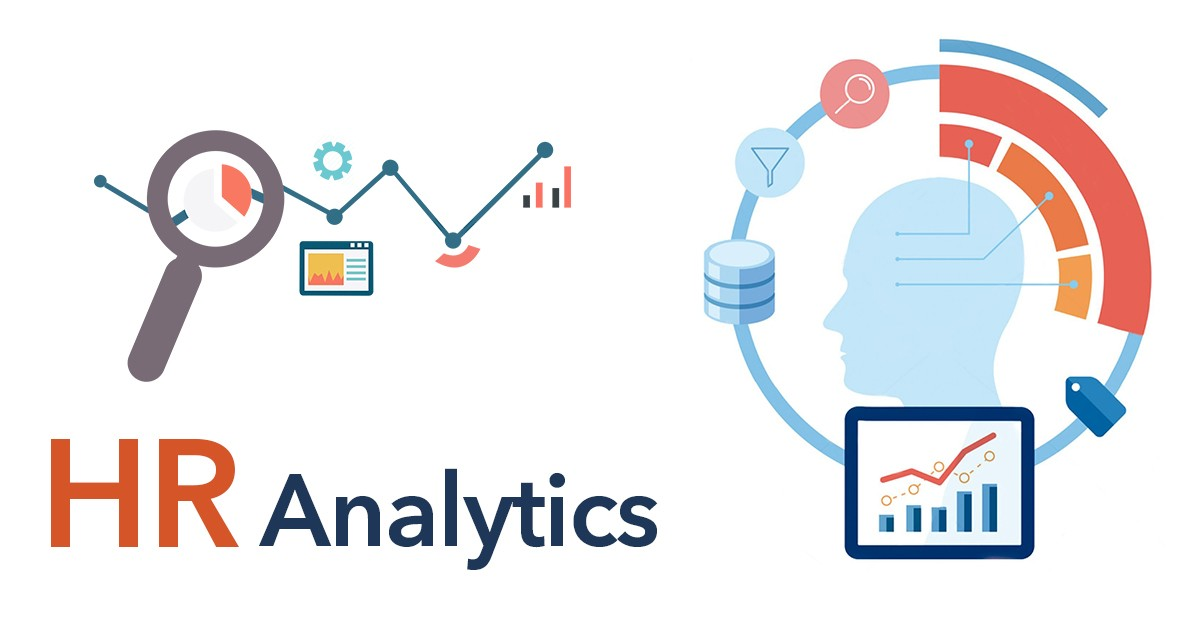

# Table of Contents:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Understanding data </a></li>
<li><a href="#wrangling">Data processing </a></li>
<li><a href="#eda">Data Cleaning</a></li>
<li><a href="#Conclusions">Conclusions</a></li>
</ul>

#  Introduction

### In this analysis, we processed and cleaned HR data received from multiple separate Excel files. We started by merging data from various sources while handling differences in column names and data formats. Then, we performed comprehensive cleaning, including handling missing values, standardizing data formats, and removing irrelevant columns to ensure the quality of the data used for analysis.

#  Understanding data

In [96]:
#import packages needed to be used
import pandas as pd # للتعامل مع البيانات
import numpy as np # لإجراء العمليات الحسابية
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib magic line
%matplotlib inline

# لضمان عرض كل الأعمدة والصفوف أثناء العمل
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [ ]:
# تحديد مسارات الملفات
file_employee = "HR/Employee.csv"
file_education = "HR/EducationLevel.csv"
file_performance = "HR/PerformanceRating.csv"
file_rating = "HR/RatingLevel.csv"
file_satisfaction = "HR/SatisfiedLevel.csv"

# قراءة الملفات باستخدام Pandas
df_employee = pd.read_csv(file_employee)
df_education = pd.read_csv(file_education)
df_performance = pd.read_csv(file_performance)
df_rating = pd.read_csv(file_rating)
df_satisfaction = pd.read_csv(file_satisfaction)

# عرض أول 5 صفوف من كل ملف لفحص البيانات
df_employee.head(), df_education.head(), df_performance.head(), df_rating.head(), df_satisfaction.head()

(  EmployeeID   FirstName LastName      Gender  Age BusinessTravel  \
 0  3012-1A41    Leonelle    Simco      Female   30    Some Travel   
 1  CBCB-9C9D     Leonerd    Aland        Male   38    Some Travel   
 2  95D7-1CE9       Ahmed    Sykes        Male   43    Some Travel   
 3  47A0-559B  Ermentrude   Berrie  Non-Binary   39    Some Travel   
 4  42CC-040A       Stace   Savege      Female   29    Some Travel   
 
         Department  DistanceFromHome (KM) State                Ethnicity  \
 0            Sales                     27    IL                    White   
 1            Sales                     23    CA                    White   
 2  Human Resources                     29    CA  Asian or Asian American   
 3       Technology                     12    IL                    White   
 4  Human Resources                     29    CA                    White   
 
    Education    EducationField              JobRole MaritalStatus  Salary  \
 0          5         Marketing     

In [185]:
# التحقق من حجم البيانات (عدد الصفوف والأعمدة)
print("🔹 حجم كل ملف:")
print("Employee:", df_employee.shape)
print("Education:", df_education.shape)
print("Performance:", df_performance.shape)
print("Rating:", df_rating.shape)
print("Satisfaction:", df_satisfaction.shape)

# التحقق من القيم المفقودة
print("\n🔍 القيم المفقودة في كل ملف:")
print("Employee:\n", df_employee.isnull().sum())
print("\nEducation:\n", df_education.isnull().sum())
print("\nPerformance:\n", df_performance.isnull().sum())
print("\nRating:\n", df_rating.isnull().sum())
print("\nSatisfaction:\n", df_satisfaction.isnull().sum())

🔹 حجم كل ملف:
Employee: (1470, 23)
Education: (5, 2)
Performance: (6709, 11)
Rating: (5, 2)
Satisfaction: (5, 2)

🔍 القيم المفقودة في كل ملف:
Employee:
 EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Education:
 EducationLevelID    0
EducationLevel      0
dtype: int64

Performance:
 PerformanceID                      0
EmployeeID                         0
ReviewDa

# Data processing

In [100]:
# 🔹 تحويل التواريخ إلى الصيغة الصحيحة
df_employee["HireDate"] = pd.to_datetime(df_employee["HireDate"], errors="coerce")
df_performance["ReviewDate"] = pd.to_datetime(df_performance["ReviewDate"], errors="coerce")

# 🔹 إزالة المسافات الزائدة في SatisfactionLevel
df_satisfaction["SatisfactionLevel"] = df_satisfaction["SatisfactionLevel"].str.strip()

# 🔹 إزالة الصفوف التي تحتوي على قيم مفقودة بشكل كبير
df_employee.dropna(subset=["HireDate"], inplace=True)
df_performance.dropna(subset=["ReviewDate"], inplace=True)

# 🔹 إعادة فحص البيانات بعد التنظيف
print("✅ البيانات بعد التنظيف:")
print("Employee:\n", df_employee.isnull().sum())
print("\nPerformance:\n", df_performance.isnull().sum())
print("\nSatisfaction:\n", df_satisfaction["SatisfactionLevel"].unique())

✅ البيانات بعد التنظيف:
Employee:
 EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Performance:
 PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpp

In [130]:
#  تنظيف أسماء الأعمدة في جميع الملفات وازالة اي مسافات
df_employee.columns = df_employee.columns.str.strip()
df_education.columns = df_education.columns.str.strip()
df_performance.columns = df_performance.columns.str.strip()
df_rating.columns = df_rating.columns.str.strip()
df_satisfaction.columns = df_satisfaction.columns.str.strip()

#  Data modeling 

In [140]:
# 🔹 دمج جدول تقييم الأداء مع جدول مستويات التقييم
df_merged = df_performance.merge(df_rating, left_on="PerformanceID", right_on="RatingID", how="left")

# 🔹 دمج الجدول الناتج مع جدول مستويات الرضا
df_merged = df_merged.merge(df_satisfaction, left_on="EnvironmentSatisfaction", right_on="SatisfactionID", how="left")

# 🔹 دمج الجدول الناتج مع جدول الموظفين
df_merged = df_merged.merge(df_employee, left_on="EmployeeID", right_on="EmployeeID", how="left")

# 🔹 دمج الجدول الناتج مع جدول التعليم
df_merged = df_merged.merge(df_education, left_on="Education", right_on="EducationLevelID", how="left")

# 🔹 عرض أول 5 صفوف من الجدول النهائي بعد الدمج
df_merged.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,RatingID,RatingLevel,SatisfactionID,SatisfactionLevel,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevelID,EducationLevel
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4,NaN,NaN,5,Very Satisfied,Alessandra,Storrock,Non-Binary,27,Some Travel,Sales,37,CA,White,4,Marketing,Sales Executive,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1,4,Masters
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3,NaN,NaN,5,Very Satisfied,Care,Heintze,Male,28,Frequent Traveller,Technology,3,NY,White,3,Business Studies,Software Engineer,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1,3,Bachelors
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4,NaN,NaN,3,Neutral,Zenia,Rattery,Female,25,Frequent Traveller,Human Resources,3,CA,American Indian or Alaska Native,3,Human Resources,Recruiter,Married,23547,0,No,2015-01-13,Yes,3,0,2,1,3,Bachelors
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2,NaN,NaN,5,Very Satisfied,Maurits,Farmery,Male,25,Some Travel,Sales,4,CA,Native Hawaiian,2,Economics,Sales Executive,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2,2,High School
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3,NaN,NaN,5,Very Satisfied,Dot,Aherne,Female,27,Some Travel,Technology,30,CA,White,1,Information Systems,Data Scientist,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1,1,No Formal Qualifications


In [213]:
# حفظ الملف النهائي بعد الدمج
df_merged.to_csv("HR_merged_Data.csv", index=False)

print("✅ تم حفظ البيانات بنجاح في ملف HR_merged_Data.csv")

✅ تم حفظ البيانات بنجاح في ملف HR_merged_Data.csv


## التحقق من جودة البيانات بعد الدمج

In [145]:
print(df_merged.isnull().sum())  # عرض عدد القيم المفقودة في كل عمود

PerformanceID                         0
EmployeeID                            0
ReviewDate                            0
EnvironmentSatisfaction               0
JobSatisfaction                       0
RelationshipSatisfaction              0
TrainingOpportunitiesWithinYear       0
TrainingOpportunitiesTaken            0
WorkLifeBalance                       0
SelfRating                            0
ManagerRating                         0
RatingID                           6709
RatingLevel                        6709
SatisfactionID                        0
SatisfactionLevel                     0
FirstName                             0
LastName                              0
Gender                                0
Age                                   0
BusinessTravel                        0
Department                            0
DistanceFromHome (KM)                 0
State                                 0
Ethnicity                             0
Education                             0


# Data Cleaning

In [157]:
#التعامل مع القيم المفقودة
df_merged["RatingID"].fillna("Not Rated", inplace=True)
df_merged["RatingLevel"].fillna("Not Rated", inplace=True)

In [155]:
print(df_merged.columns)  # عرض جميع أسماء الأعمدة

Index(['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating', 'RatingID',
       'RatingLevel', 'SatisfactionID', 'SatisfactionLevel', 'FirstName',
       'LastName', 'Gender', 'Age', 'BusinessTravel', 'Department',
       'DistanceFromHome (KM)', 'State', 'Ethnicity', 'Education',
       'EducationField', 'JobRole', 'MaritalStatus', 'Salary',
       'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EducationLevelID', 'EducationLevel'],
      dtype='object')


In [181]:
#حذف الاعمدة غير المهمة في التحليل 
cols_to_drop = ["SatisfactionID", "EducationLevelID"]
df_merged = df_merged.drop(columns=[col for col in cols_to_drop if col in df_merged.columns])

In [194]:
# حفظ الملف النهائي بعد الدمج
df_merged.to_csv("Human_Resources_Cleaned_Data.csv", index=False)

print("✅ تم حفظ البيانات بنجاح في ملف Human_Resources_Cleaned_Data.csv")

✅ تم حفظ البيانات بنجاح في ملف Human_Resources_Cleaned_Data.csv


# Conclusions

### After applying data cleaning and modeling processes, we now have a consistent and unified dataset ready for analysis and extracting valuable insights. This data can now be used to make well-informed decisions in areas such as performance evaluation, employee satisfaction, and more efficient human resource management.
